In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [27]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(-1,28,28,1) / 255
test_images = test_images.reshape(-1,28,28,1) / 255

In [28]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2)) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(training_images, keras.utils.to_categorical(training_labels,num_classes=10), validation_split=0.2, epochs=5, batch_size=256)

Epoch 1/5
188/188 [==============================] - 49s 260ms/step - loss: 0.3334 - accuracy: 0.9031 - val_loss: 0.0965 - val_accuracy: 0.9722
Epoch 2/5
188/188 [==============================] - 49s 263ms/step - loss: 0.0772 - accuracy: 0.9767 - val_loss: 0.0597 - val_accuracy: 0.9827
Epoch 3/5
188/188 [==============================] - 49s 260ms/step - loss: 0.0551 - accuracy: 0.9831 - val_loss: 0.0533 - val_accuracy: 0.9843
Epoch 4/5
188/188 [==============================] - 48s 257ms/step - loss: 0.0402 - accuracy: 0.9879 - val_loss: 0.0452 - val_accuracy: 0.9868
Epoch 5/5
188/188 [==============================] - 48s 257ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0452 - val_accuracy: 0.9866


In [30]:
import pickle
with open('history/fashion_mnist_history', 'wb') as file:
        pickle.dump(history.history, file)
loaded_history = pickle.load(open('history/fashion_mnist_history', "rb"))

In [31]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

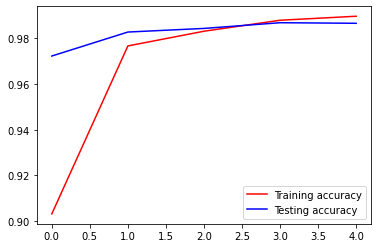

In [32]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Testing accuracy')
plt.legend()
plt.show()

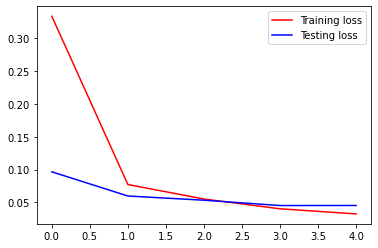

In [33]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Testing loss')
plt.legend()
plt.show()